In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
boston = datasets.load_boston()

In [3]:
boston.keys()

dict_keys(['DESCR', 'target', 'data', 'feature_names'])

In [4]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
X = boston['data']
Y = np.int_(boston['target'])

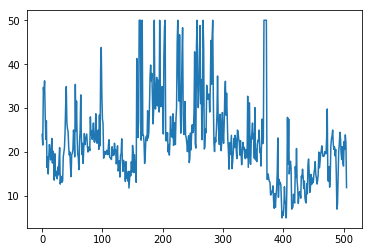

In [6]:
plt.plot(boston['target'])

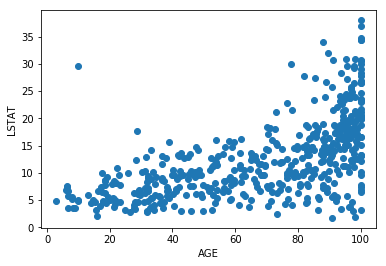

In [7]:
plt.scatter(X[:,6], X[:,12])
plt.xlabel(boston.feature_names[6])
plt.ylabel(boston.feature_names[12])

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X[:200], Y[:200])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

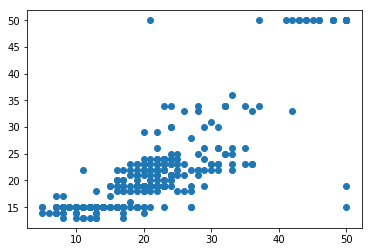

In [11]:
prediction = rf.predict(X[200:])
plt.scatter(Y[200:], prediction)

In [12]:
n_trees_total = 50
square_sum = np.zeros(n_trees_total)
for i in range(n_trees_total):
    rf = RandomForestClassifier(n_estimators=i+1)
    rf.fit(X[:200], Y[:200])
    prediction = rf.predict(X[200:])
    square_sum[i] = sum((prediction - Y[200:])**2)

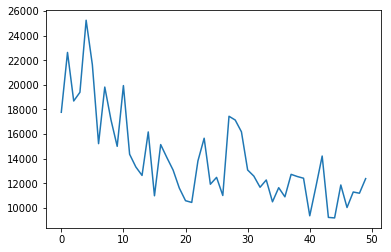

In [13]:
plt.plot(square_sum)

In [28]:
ii = np.argsort(rf.feature_importances_)
for name, value in zip(boston.feature_names[ii], rf.feature_importances_[ii]):
    print(name, value)

CHAS 0.00461985059843
ZN 0.0198510650241
RAD 0.0302111558979
PTRATIO 0.0464127427209
TAX 0.0476314680476
NOX 0.0499362039337
INDUS 0.0555416961106
DIS 0.0979771804717
AGE 0.107225628271
B 0.115765530935
CRIM 0.13761439845
RM 0.139816030998
LSTAT 0.147397048542


### Ejercicio
Utilice el siguiente dataset para clasificarlo con un bosque aleatorio
http://archive.ics.uci.edu/ml/datasets/Dorothea . Cuales son las variables mas importantes?